<a href="https://colab.research.google.com/github/jennychen0223/Mnist_models/blob/main/Mnist_model_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [ ]:
 (train_feature, train_label),(test_feature, test_label) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(train_feature), len(train_label))
print(train_feature.shape, train_label.shape)


60000 60000
(60000, 28, 28) (60000,)


In [ ]:
def show_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2) #數字圖片大小
  plt.imshow(image, cmap='binary') #顯示黑白灰階
  plt.show()

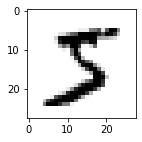

In [ ]:
show_image(train_feature[0])

In [ ]:
print(train_label[0])

5


In [ ]:
def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
  plt.gcf().set_size_inches(12, 14)
  if num>25: num=25
  for i in range(num):
    ax = plt.subplot(5,5,i+1)
    #顯示黑白圖片
    ax.imshow(images[start_id], cmap = 'binary')

    #有預測結果資料，才顯示結果
    if (len(predictions) > 0):
      title = 'ai = ' + str(predictions[i])
      #預測正確顯示o / 預測正確顯示x
      title += ('(o)' if predictions[i] == labels[i] else '(x)')
      title += '\nlabel = ' + str(labels[i])
    #沒有預測結果，只在標題顯示真實數值
    else:
      title = 'label =' + str(labels[i])
    #x, y軸不顯示刻度
    ax.set_title(title, fontsize=12)
    ax.set_xticks([]); ax.set_yticks([])
    start_id += 1
  plt.show()

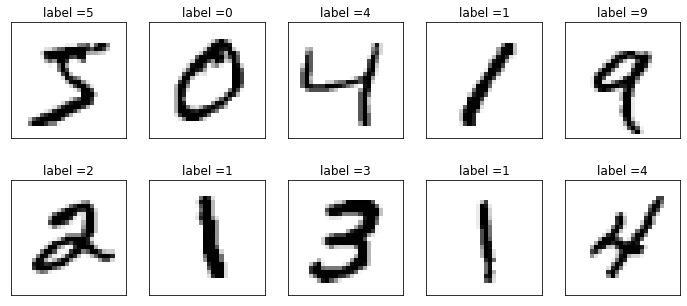

In [ ]:
show_images_labels_predictions(train_feature, train_label, [], 0, 10)

Feature 資料預處理

In [ ]:
train_feature_vector = train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')

In [ ]:
print(train_feature_vector.shape, test_feature_vector.shape)

(60000, 784) (10000, 784)


In [ ]:
print(train_feature_vector[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

標準化

In [ ]:
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

print(train_feature_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Label資料預處理

In [ ]:
print(train_label[0:5])

[5 0 4 1 9]


In [ ]:
!pip install np_utils
from keras.utils import np_utils


     |████████████████████████████████| 61 kB 3.4 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57132 sha256=15febba7d2ed317a3e74cfa806082a936d0a09799898cdb9fd32f15b8520ab7e
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


In [ ]:
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


建模型

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units = 26,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

In [ ]:
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
train_history = model.fit(x=train_feature_normalize,
                          y=train_label_onehot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 200,
                          verbose = 2)

Epoch 1/10
240/240 - 15s - loss: 0.9086 - accuracy: 0.7693 - val_loss: 0.3690 - val_accuracy: 0.9003
Epoch 2/10
240/240 - 1s - loss: 0.3469 - accuracy: 0.9038 - val_loss: 0.2943 - val_accuracy: 0.9173
Epoch 3/10
240/240 - 1s - loss: 0.2958 - accuracy: 0.9168 - val_loss: 0.2640 - val_accuracy: 0.9252
Epoch 4/10
240/240 - 1s - loss: 0.2696 - accuracy: 0.9245 - val_loss: 0.2429 - val_accuracy: 0.9321
Epoch 5/10
240/240 - 1s - loss: 0.2438 - accuracy: 0.9319 - val_loss: 0.2250 - val_accuracy: 0.9378
Epoch 6/10
240/240 - 1s - loss: 0.2218 - accuracy: 0.9377 - val_loss: 0.2079 - val_accuracy: 0.9417
Epoch 7/10
240/240 - 1s - loss: 0.2046 - accuracy: 0.9423 - val_loss: 0.1989 - val_accuracy: 0.9444
Epoch 8/10
240/240 - 1s - loss: 0.1914 - accuracy: 0.9457 - val_loss: 0.1884 - val_accuracy: 0.9459
Epoch 9/10
240/240 - 1s - loss: 0.1801 - accuracy: 0.9492 - val_loss: 0.1811 - val_accuracy: 0.9499
Epoch 10/10
240/240 - 1s - loss: 0.1708 - accuracy: 0.9516 - val_loss: 0.1748 - val_accuracy: 0.950

In [ ]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n 準確率=', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1727 - accuracy: 0.9514

 準確率= 0.9513999819755554


In [ ]:
prediction = model.predict_classes(test_feature_normalize)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


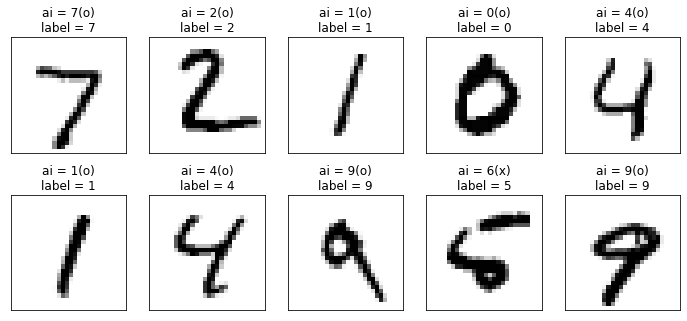

In [ ]:
show_images_labels_predictions(test_feature, test_label, prediction, 0)

In [ ]:
model.save('Mnist_model_MLP.h5')
print("模型儲存完畢")

模型儲存完畢


In [ ]:
load_model('Mnist_model_MLP.h5')
